### Correlation between Mean of Absolute Differences and Total Residuals

### Import libraries and set plotting style

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error
import warnings

sys.path.append('../scr')
from data_preprocessing import *
from analysis import *
from utils import *
from plot import *


 ### Feature Numbers and Model Types

In [2]:
feature_numbers = ['9', '20']  
model_types = ['LP','RP']  

### Loading and Cleaning Data

In [3]:
id_credit, _, df_9, df_20, df_11 = preprocess_credit_data()

In [4]:
df_predictions = load_and_clean_predictions('credit','predictions',feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/credit_predictions_9LP_1204_2151.csv for model 9LP
Loaded file: ../predictions/credit_predictions_9RP_1204_2202.csv for model 9RP
Loaded file: ../predictions/credit_predictions_20LP_1104_2235.csv for model 20LP
Loaded file: ../predictions/credit_predictions_20RP_1104_2259.csv for model 20RP


### Predicting Features in 𝐵 with Models Trained on 𝐴∖𝐵

In [5]:

lr_models_for_B = feature_dependency_models(df_11, df_9, model_type="linear")
rf_models_for_B = feature_dependency_models(df_11, df_9, model_type="random_forest")


In [7]:
print(lr_models_for_B)

{'laufzeit': LinearRegression(), 'wohnzeit': LinearRegression(), 'verw_0': LinearRegression(), 'verw_1': LinearRegression(), 'verw_2': LinearRegression(), 'verw_3': LinearRegression(), 'verw_4': LinearRegression(), 'verw_5': LinearRegression(), 'verw_6': LinearRegression(), 'verw_8': LinearRegression(), 'verw_9': LinearRegression(), 'verw_10': LinearRegression(), 'sparkont_1': LinearRegression(), 'sparkont_2': LinearRegression(), 'sparkont_3': LinearRegression(), 'sparkont_4': LinearRegression(), 'sparkont_5': LinearRegression(), 'buerge_1': LinearRegression(), 'buerge_2': LinearRegression(), 'buerge_3': LinearRegression(), 'verm_1': LinearRegression(), 'verm_2': LinearRegression(), 'verm_3': LinearRegression(), 'verm_4': LinearRegression(), 'weitkred_1': LinearRegression(), 'weitkred_2': LinearRegression(), 'weitkred_3': LinearRegression(), 'wohn_1': LinearRegression(), 'wohn_2': LinearRegression(), 'wohn_3': LinearRegression(), 'telef_1': LinearRegression(), 'telef_2': LinearRegressi

### Computing Total Residuals for Individuals

In [9]:
total_residuals_lr = compute_total_residuals(df_11, df_9, lr_models_for_B , id_credit)

Processing individual 1/1000
Processing individual 2/1000
Processing individual 3/1000
Processing individual 4/1000
Processing individual 5/1000
Processing individual 6/1000
Processing individual 7/1000
Processing individual 8/1000
Processing individual 9/1000
Processing individual 10/1000
Processing individual 11/1000
Processing individual 12/1000
Processing individual 13/1000
Processing individual 14/1000
Processing individual 15/1000
Processing individual 16/1000
Processing individual 17/1000
Processing individual 18/1000
Processing individual 19/1000
Processing individual 20/1000
Processing individual 21/1000
Processing individual 22/1000
Processing individual 23/1000
Processing individual 24/1000
Processing individual 25/1000
Processing individual 26/1000
Processing individual 27/1000
Processing individual 28/1000
Processing individual 29/1000
Processing individual 30/1000
Processing individual 31/1000
Processing individual 32/1000
Processing individual 33/1000
Processing individu

In [10]:
total_residuals_rf = compute_total_residuals(df_11, df_9, rf_models_for_B , id_credit)

Processing individual 1/1000
Processing individual 2/1000
Processing individual 3/1000
Processing individual 4/1000
Processing individual 5/1000
Processing individual 6/1000
Processing individual 7/1000
Processing individual 8/1000
Processing individual 9/1000
Processing individual 10/1000
Processing individual 11/1000
Processing individual 12/1000
Processing individual 13/1000
Processing individual 14/1000
Processing individual 15/1000
Processing individual 16/1000
Processing individual 17/1000
Processing individual 18/1000
Processing individual 19/1000
Processing individual 20/1000
Processing individual 21/1000
Processing individual 22/1000
Processing individual 23/1000
Processing individual 24/1000
Processing individual 25/1000
Processing individual 26/1000
Processing individual 27/1000
Processing individual 28/1000
Processing individual 29/1000
Processing individual 30/1000
Processing individual 31/1000
Processing individual 32/1000
Processing individual 33/1000
Processing individu

In [12]:
print(total_residuals_lr)
print(total_residuals_rf)

     id_dataset  total_residual
0             0       14.250630
1             1       22.410499
2             2       21.779167
3             3       27.776937
4             4       28.809967
..          ...             ...
995         995       20.619304
996         996       26.469377
997         997       21.466199
998         998       20.756644
999         999       19.872129

[1000 rows x 2 columns]
     id_dataset  total_residual
0             0        6.824138
1             1        5.294857
2             2        9.840412
3             3        7.869741
4             4        9.523292
..          ...             ...
995         995        8.018630
996         996        8.231047
997         997        7.375592
998         998        7.192815
999         999        8.834592

[1000 rows x 2 columns]


### Mean of Absolute Differences

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}

In [13]:
mean_of_abs_diff_df = {}
prefixes = ['LM', 'RM', 'LM', 'RM']

for model_type, prefix in zip(model_types, prefixes):
    abs_diff_9vs20 = compute_row_stats(
        compute_absolute_difference(
            df_predictions['9'][model_type], 
            df_predictions['20'][model_type], 
            substring_1=f'9{prefix}', 
            substring_2=f'20{prefix}'
        )
    )['mean']
 
    mean_of_abs_diff_df[model_type] = pd.DataFrame({
        'abs_diff_9vs20': abs_diff_9vs20,
    })

combined_mean_of_abs_diff_df = pd.concat(mean_of_abs_diff_df, axis=1)

In [14]:
lp_abs_diff_values = combined_mean_of_abs_diff_df[('LP', 'abs_diff_9vs20')]
rp_abs_diff_values = combined_mean_of_abs_diff_df[('RP', 'abs_diff_9vs20')]
#print(lp_abs_diff_values)


### Correlation between Mean of Absolute Differences and Total Residuals

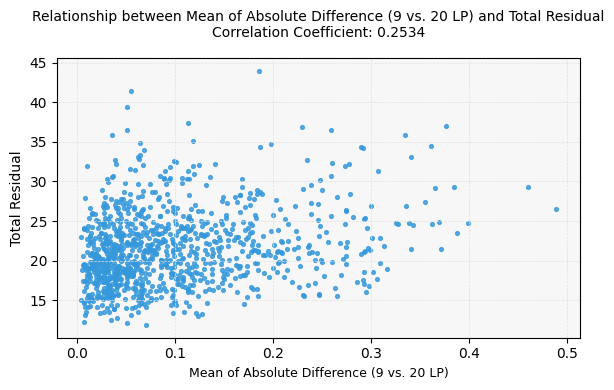

In [15]:
spearman_corr = plot_residuals_vs_differences(
    mean_diff=lp_abs_diff_values, 
    total_residual=total_residuals_lr['total_residual'], 
    label_1='Mean of Absolute Difference (9 vs. 20 LP)',
)


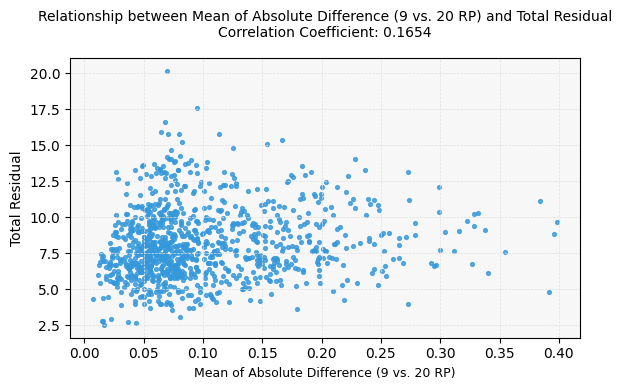

In [16]:
spearman_corr = plot_residuals_vs_differences(
    mean_diff=rp_abs_diff_values, 
    total_residual=total_residuals_rf['total_residual'], 
    label_1='Mean of Absolute Difference (9 vs. 20 RP)'
)